# Esercizio finale 2
#### L'obiettivo di questo esercizio è generare un set di dati di autogenerati utilizzando le Lib., analizzarli con pandas e visualizzare i risultati usando Matplotlib. Gli studenti dovranno eseguire le seguenti operazioni:



- Generazione dei Dati: Utilizzare NumPy per generare una serie temporale
di 365 giorni di dati, simulando il numero di visitatori giornalieri in
un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
tempo per simulare l'aumento della popolarità del parco.
- Creazione del DataFrame: Creare un DataFrame pandas con le date come
indice e il numero di visitatori come colonna e una collonna casuale
della patologia scelta fra 3(ossa, cuore, testa ).
- Analisi dei Dati: Calcolare il numero medio di visitatori per mese e la
deviazione standard e quale patologia è più e quale meno trovata.
- Visualizzazione dei Dati:
    - Creare un grafico a linee del numero di visitatori giornalieri.
    - Aggiungere al grafico la media mobile a 7 giorni per mostrare la
tendenza settimanale.
    - Creare un secondo grafico che mostri la media mensile dei visitatori.
    - creare un grafico che mostri la divisione fra le 3 patologie 




In [1902]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1903]:
n_medio = 1200
val_std= 900
GIORNI = 365

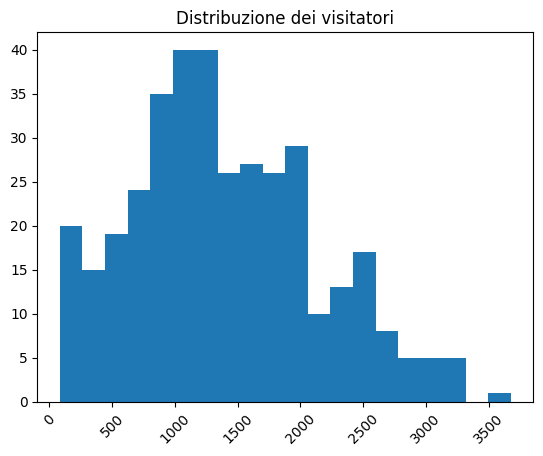

Media: 1398.5753424657535; std: 740.3721633164795


In [1904]:
# Generazione dei Dati: Utilizzare NumPy per generare una serie temporale
# di 305 giorni di dati, simulando il numero di visitatori giornalieri in
# un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
# deviazione standard di 900.
v = np.random.normal(n_medio, val_std, size=GIORNI)
while len(v[v < 0])>0:
    temp = v[v < 0]
    new_media = n_medio-v.mean()
    new_std = val_std+v.std()
    v[v < 0] = np.random.normal(new_media, new_std, size=len(temp))
v = np.round(v)
v[v == 0] = np.nan
plt.title('Distribuzione dei visitatori')
plt.hist(v, bins=20)
plt.xticks(rotation=45)
plt.show()
print(f'Media: { v.mean()}; std: {np.std(v)}')

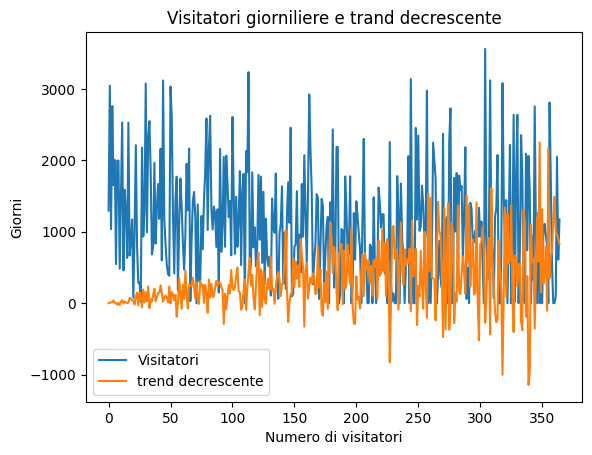

In [1905]:
# Inoltre, aggiungere un trend decrescente nel tempo per simulare l'aumento della popolarità del parco.
list_day = np.arange(0, GIORNI)+1

t = np.zeros(GIORNI)
for i, day in enumerate(list_day):
    temp = np.random.normal(day*2, day*2, size=1)
    temp = temp.astype(dtype=np.int32)
    t[i] = temp[0]
v=v-t
v[v < 0] = 0
plt.title('Visitatori giorniliere e trand decrescente')
plt.plot(v, label='Visitatori')
plt.plot(t, label= 'trend decrescente')
plt.xlabel('Numero di visitatori')
plt.ylabel('Giorni')
plt.legend()

In [1906]:
data_iniziale = np.datetime64('2025-01-01')

# Genera giorni consecutivi
lista_date = np.arange(data_iniziale, data_iniziale + GIORNI, dtype='datetime64[D]')
lista_date.shape

(365,)

In [1907]:
# Definizione delle opzioni
opzioni = ['Testa', 'Cuore', 'Ossa']

lista_motivazione = np.random.choice(opzioni, size=GIORNI)

In [1908]:
# Creazione del DataFrame: Creare un DataFrame pandas con le date come
# indice e il numero di visitatori come colonna e una collonna casuale
# della patologia scelta fra 3(ossa, cuore, testa ).
dict_df = {
    "Data": lista_date,
    "Visitatori": v,
    "Motivazione": lista_motivazione
}

df = pd.DataFrame(dict_df) #
df["Data"] = pd.to_datetime(df["Data"])
df.set_index('Data')
df.head()

,Data,Visitatori,Motivazione
0,2025-01-01,1296.0,Testa
1,2025-01-02,3045.0,Testa
2,2025-01-03,1035.0,Cuore
3,2025-01-04,2761.0,Testa
4,2025-01-05,1652.0,Testa


In [1909]:
df["Mese"] = df["Data"].dt.to_period("M")
gruppo_mese = df.groupby("Mese").agg({"Visitatori": ['mean', 'std']}).reset_index()
gruppo_mese

Mese   Visitatori             
                    mean          std
0   2025-01  1363.064516   880.770645
1   2025-02  1390.428571   825.999840
2   2025-03  1194.000000   679.832528
3   2025-04  1342.500000   735.096088
4   2025-05   942.806452   620.908228
5   2025-06  1092.566667   659.269224
6   2025-07   905.064516   748.918462
7   2025-08   756.612903   686.461637
8   2025-09  1091.466667   952.505362
9   2025-10  1045.516129   719.899385
10  2025-11  1223.533333  1061.131560
11  2025-12   892.354839   859.618154

In [1910]:
cont_motivazione = df.groupby(["Mese", "Motivazione"]).size().reset_index(name="Cont")
print(cont_motivazione.head())
# Per ogni mese, trovare la patologia più comune e meno comune
def pat_comune(df_mese):
    patologia_piu_comune = df_mese.loc[df_mese["Cont"].idxmax(), "Motivazione"]
    patologia_meno_comune = df_mese.loc[df_mese["Cont"].idxmin(), "Motivazione"]
    return pd.Series({"Più comune": patologia_piu_comune, "Meno comune": patologia_meno_comune})

res = cont_motivazione.groupby("Mese").apply(pat_comune).reset_index()
res

      Mese Motivazione  Cont
0  2025-01       Cuore     8
1  2025-01        Ossa    10
2  2025-01       Testa    13
3  2025-02       Cuore     5
4  2025-02        Ossa    11


C:\Users\danie\AppData\Local\Temp\ipykernel_30120\1246084787.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = cont_motivazione.groupby("Mese").apply(pat_comune).reset_index()


,Mese,Più comune,Meno comune
0,2025-01,Testa,Cuore
1,2025-02,Testa,Cuore
2,2025-03,Ossa,Testa
3,2025-04,Ossa,Testa
4,2025-05,Cuore,Testa
5,2025-06,Cuore,Cuore
6,2025-07,Testa,Ossa
7,2025-08,Testa,Cuore
8,2025-09,Cuore,Ossa
9,2025-10,Testa,Ossa


In [1911]:
df

,Data,Visitatori,Motivazione,Mese
0,2025-01-01,1296.0,Testa,2025-01
1,2025-01-02,3045.0,Testa,2025-01
2,2025-01-03,1035.0,Cuore,2025-01
3,2025-01-04,2761.0,Testa,2025-01
4,2025-01-05,1652.0,Testa,2025-01
...,...,...,...,...
360,2025-12-27,0.0,Testa,2025-12
361,2025-12-28,98.0,Cuore,2025-12
362,2025-12-29,2050.0,Ossa,2025-12
363,2025-12-30,608.0,Ossa,2025-12


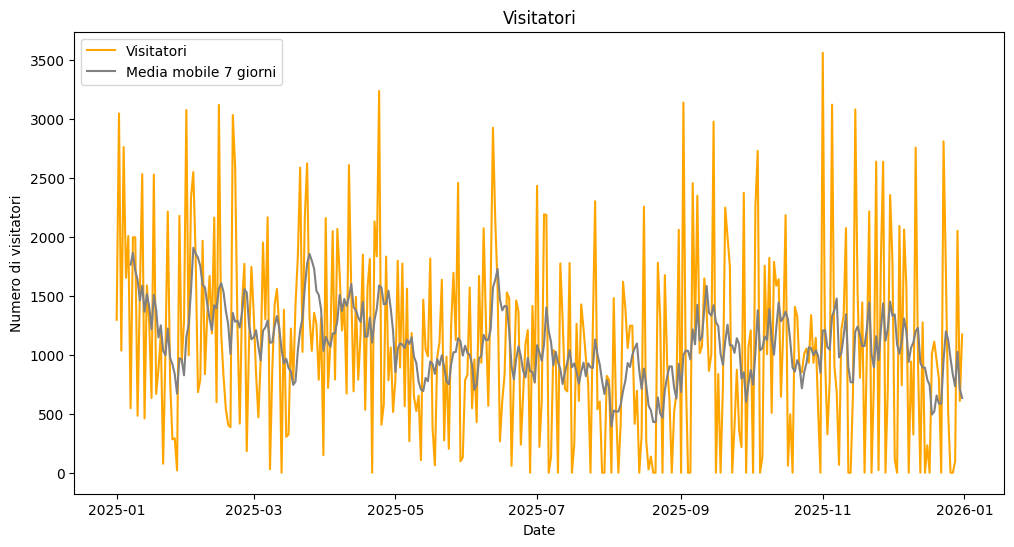

In [1912]:
# Creare un grafico a linee del numero di visitatori giornalieri.
# Aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale.
df["Media7G"] = df["Visitatori"].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.title('Visitatori')
plt.plot(df["Data"], df["Visitatori"], label="Visitatori", color="orange")
plt.plot(df["Data"], df["Media7G"], label="Media mobile 7 giorni", color="gray")
plt.ylabel("Numero di visitatori")
plt.xlabel('Date')
plt.legend()

In [1913]:
# Preparo i dati
mesi, y, z = cont_motivazione['Mese'].unique(), gruppo_mese['Visitatori', 'mean'].array, gruppo_mese['Visitatori', 'std'].array
x = []
for mese in mesi:
    temp = str(mese)[-2:]
    if temp[0]== '0':
        temp = temp[1:]
    x.append(temp)

In [1914]:
gruppo_mese

Mese   Visitatori             
                    mean          std
0   2025-01  1363.064516   880.770645
1   2025-02  1390.428571   825.999840
2   2025-03  1194.000000   679.832528
3   2025-04  1342.500000   735.096088
4   2025-05   942.806452   620.908228
5   2025-06  1092.566667   659.269224
6   2025-07   905.064516   748.918462
7   2025-08   756.612903   686.461637
8   2025-09  1091.466667   952.505362
9   2025-10  1045.516129   719.899385
10  2025-11  1223.533333  1061.131560
11  2025-12   892.354839   859.618154

Text(0.5, 0, "Mesi dell'anno")

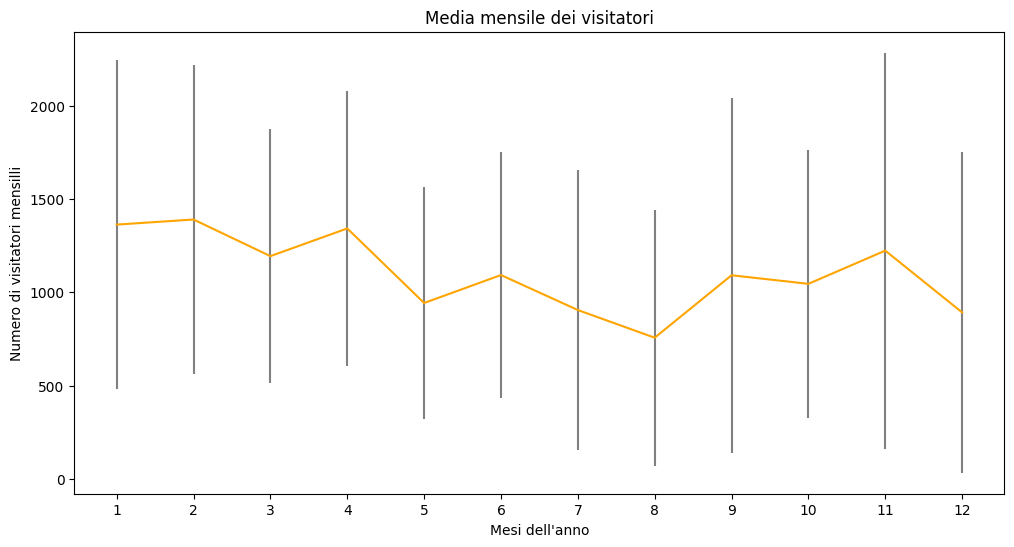

In [1915]:
plt.figure(figsize=(12, 6))
plt.title('Media mensile dei visitatori')
plt.errorbar(x, y, yerr=z, label="", color="orange", ecolor='gray')
plt.ylabel("Numero di visitatori mensilli")
plt.xlabel("Mesi dell'anno")

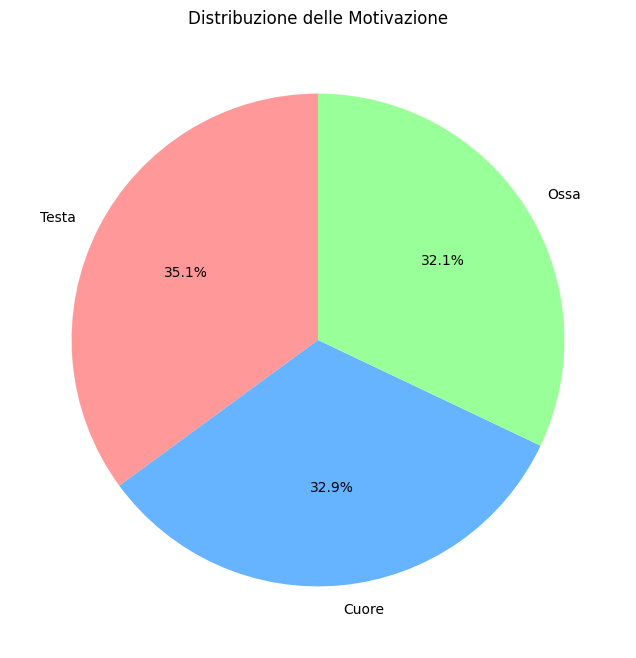

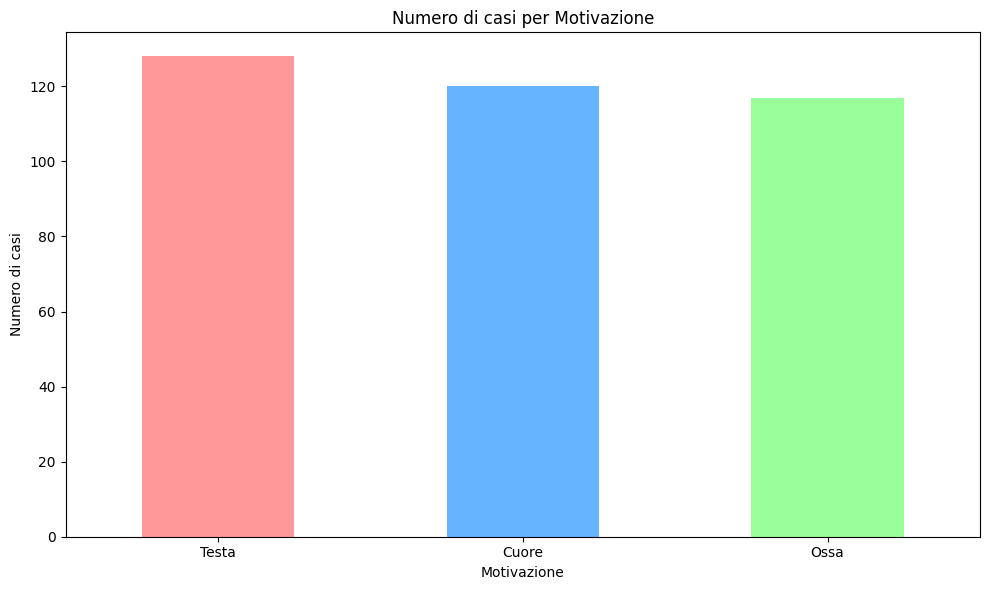

In [1916]:
#creare un grafico che mostri la divisione fra le 3 patologie
cont_pat = df["Motivazione"].value_counts()

# Grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(
    cont_pat,
    labels=cont_pat.index,
    autopct="%1.1f%%",
    colors=["#ff9999", "#66b3ff", "#99ff99"],
    startangle=90
)
plt.title("Distribuzione delle Motivazione")
plt.show()

# Grafico a barre
plt.figure(figsize=(10, 6))
cont_pat.plot(kind="bar", color=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Numero di casi per Motivazione")
plt.xlabel("Motivazione")
plt.ylabel("Numero di casi")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()